In [1177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [1178]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams.update({'font.size': 14})

Lego corporate design

In [1179]:
colors ={
    'red':'#E3000B',
    'blue':'#015AD1',
    'black':'#000000',
    'yellow':'#FFD504',
    'white':'#FFFFFF'
}

Load the data

In [1180]:
amazon_insights = pd.read_csv('../data/amazon_co-ecommerce_sample.csv')
lego_sets = pd.read_csv('../data/lego_sets.csv')

In [1181]:
print(f'lego_sets: {lego_sets.shape}')

lego_sets: (12261, 14)


In [1182]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [1183]:
lego_sets.head(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US


In [1184]:
lego_sets['prod_id']=lego_sets['prod_id'].astype(int)

# EDA 

## Lego

In [1185]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  int32  
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(6), int32(1), object(7)
memory usage: 1.3+ MB


In [1186]:
lego_sets.head(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US


In [1187]:
def map_difficulty(difficulty):
    if difficulty == 'Easy':
        return int(2)
    elif difficulty == 'Very Easy':
        return int(1)
    elif difficulty == 'Average':
        return int(3)
    elif difficulty == 'Challenging':
        return int(4)
    elif difficulty == 'Very Challenging':
        return int(5)
    else:
        return np.nan


lego_sets['review_difficulty'] = lego_sets['review_difficulty'].apply(map_difficulty)

In [1188]:
lego_sets.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10206.00000,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,2.46698,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.82717,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.00000,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,2.00000,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,2.00000,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,3.00000,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.00000,5.000000,5.000000


Split into categroical and numerical datasets

In [1189]:
lego_sets_cat = lego_sets.select_dtypes(include='object').copy()
lego_sets_num = lego_sets.select_dtypes(include='float').copy()

#### Handling of missing values 

In [1190]:
lego_missing_values = lego_sets[["num_reviews","play_star_rating", 'prod_desc',"review_difficulty","star_rating","val_star_rating"]]
lego_missing_values

,num_reviews,play_star_rating,prod_desc,review_difficulty,star_rating,val_star_rating
0,2.0,4.0,Catapult into action and take back the eggs fr...,3.0,4.5,4.0
1,2.0,4.0,Launch a flying attack and rescue the eggs fro...,2.0,5.0,4.0
2,11.0,4.3,Chase the piggy with lightning-fast Chuck and ...,2.0,4.3,4.1
3,23.0,3.6,Explore the architecture of the United States ...,3.0,4.6,4.3
4,14.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,4.0,4.6,4.1
...,...,...,...,...,...,...
12256,6.0,4.4,Protect NINJAGO® City from flying Manta Ray Bo...,2.0,4.3,4.2
12257,8.0,4.1,Stop a Piranha Attack with Kai and Misako!,2.0,3.6,4.1
12258,18.0,4.6,Stop a crime in the NINJAGO® City street market!,2.0,4.6,4.5
12259,1.0,5.0,Achieve Spinjitzu greatness with the Green Ninja!,1.0,5.0,5.0


In [1191]:
lego_missing_values.loc[lego_missing_values.isnull().any(axis=1)]

,num_reviews,play_star_rating,prod_desc,review_difficulty,star_rating,val_star_rating
22,1.0,NaN,Master the skills of a green-skinned assassin ...,NaN,5.0,NaN
32,NaN,NaN,Join the Justice League™ with LEGO® BrickHeadz...,NaN,NaN,NaN
48,NaN,NaN,Keep the crooks from escaping with the gold bars!,NaN,NaN,NaN
55,1.0,5.0,Head to the LEGO® City mine and dig up some gold!,NaN,5.0,5.0
69,NaN,NaN,Race after the crook and avoid the mountain ro...,NaN,NaN,NaN
...,...,...,...,...,...,...
12136,NaN,NaN,Own a true Sith Lord with Darth Maul!,NaN,NaN,NaN
12137,NaN,NaN,Battle the bad guys with Han Solo!,NaN,NaN,NaN
12196,NaN,NaN,Collect the ultimate long-range Rebel starfigh...,NaN,NaN,NaN
12214,1.0,5.0,Get ready for high-speed action and impacts wi...,NaN,5.0,5.0


Missing values are replaced by 0, product desc will be deleted, because prod_desc_long has no missing values

In [1192]:
lego_sets.drop(columns='prod_desc', inplace=True)

In [1193]:
lego_sets = lego_sets.fillna(0)

#### Minimum Age

In [1194]:
lego_sets['min_age'] = lego_sets['ages'].str.extract(r'(\d+)').astype(float)

In [1195]:
lego_sets.loc[lego_sets['ages'].str.contains('1½', case=False, na=False), 'min_age'] = 1.5

#### Duplicates 

In [1196]:
lego_sets = lego_sets.drop_duplicates()

In [1197]:
lego_sets.loc[lego_sets['prod_id']== 41310.0]

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,min_age
397,6-12,19.9900,1.0,185.0,4.0,41310,Help Stephanie make a LEGO® Friends Heartlake ...,2.0,Heartlake Gift Delivery,4.0,Friends,5.0,US,6.0
2925,6-12,19.4922,1.0,185.0,4.0,41310,Help Stephanie make a LEGO® Friends Heartlake ...,2.0,Heartlake Gift Delivery,4.0,Friends,5.0,CA,6.0


In [1198]:
lego_sets['prod_id'].value_counts()

prod_id
71020    22
70628    22
10572    21
75191    21
21310    21
         ..
41306     2
41127     2
41301     2
41310     2
41312     2
Name: count, Length: 744, dtype: int64

In [1199]:
lego_sets['country'].value_counts()

country
US    722
CA    720
NL    510
GB    510
AT    509
DN    509
IE    507
AU    506
CH    505
NZ    503
FR    503
BE    501
IT    488
LU    487
NO    487
FI    487
ES    487
DE    487
CZ    487
PT    485
PL    472
Name: count, dtype: int64

create unique out of US as the country with the most products (22 products are missing) + the unique IDs which are not in the US (AU and AT)

In [1200]:
filtered_US = lego_sets[lego_sets['country'].str.contains('US')]

lego_sets_uniq_id1 = filtered_US.drop_duplicates(subset='prod_id', inplace=False)

filtered_no_US = lego_sets.drop_duplicates(subset='prod_id', inplace=False)

lego_stes_uniq_id2 = filtered_no_US.loc[lego_sets['country']!= 'US']


lego_sets_uniq_id = pd.concat([lego_sets_uniq_id1, lego_stes_uniq_id2])

In [1201]:
lego_sets_uniq_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               744 non-null    object 
 1   list_price         744 non-null    float64
 2   num_reviews        744 non-null    float64
 3   piece_count        744 non-null    float64
 4   play_star_rating   744 non-null    float64
 5   prod_id            744 non-null    int32  
 6   prod_long_desc     744 non-null    object 
 7   review_difficulty  744 non-null    float64
 8   set_name           744 non-null    object 
 9   star_rating        744 non-null    float64
 10  theme_name         744 non-null    object 
 11  val_star_rating    744 non-null    float64
 12  country            744 non-null    object 
 13  min_age            744 non-null    float64
dtypes: float64(8), int32(1), object(5)
memory usage: 84.3+ KB


In [1202]:
lego_review_difficulty = lego_sets_uniq_id[~lego_sets_uniq_id['review_difficulty'].isna()]

In [1203]:
lego_sets_uniq_id['min_age'].value_counts()

min_age
7.0     155
6.0     117
8.0     114
5.0      80
10.0     58
4.0      53
2.0      48
9.0      43
1.5      22
12.0     19
16.0     19
14.0     11
11.0      5
Name: count, dtype: int64

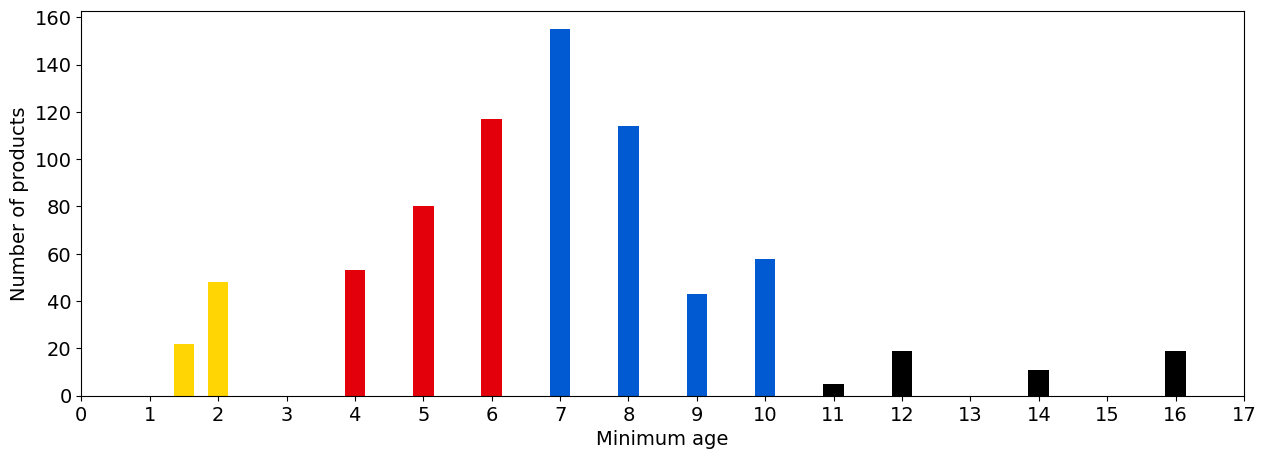

In [1204]:
palette = [colors['blue'], #7
           colors['red'], #6
           colors['blue'], #8
           colors['red'], #5
           colors['blue'], #10
           colors['red'], #4
           colors['yellow'],#2 
           colors['blue'],#9
           colors['yellow'], #1.5
           colors['black'], # 12
           colors['black'],# 16
           colors['black'],# 14
             colors['black']] #11 

plt.figure(figsize=(15,5))
plt.bar(lego_sets_uniq_id['min_age'].value_counts().index, height= lego_sets_uniq_id['min_age'].value_counts().values, color=palette, width= 0.3)
plt.ylabel('Number of products')
plt.xlabel('Minimum age')
plt.xticks(np.arange(0,18.0, 1))
plt.show()

In [1205]:
means = []
avg_pices = []
ages = list(lego_sets_uniq_id['min_age'].value_counts().index)
for i in ages:
    mean = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] == i) ]['review_difficulty'].mean()
    pieces = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] == i)]['piece_count'].mean()
    means.append(mean)
    avg_pices.append(pieces)

In [1206]:
ages_mean  = pd.DataFrame(data = {'diff_mean': means, 'age_group': ages, 'avg_pieces': avg_pices})
ages_mean= ages_mean.sort_values('age_group')

In [1207]:
diffmean1_2 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] == 1.5) | (lego_sets_uniq_id['min_age'] == 2.0)]['review_difficulty'].mean()
diffmean3_6 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 4.0) & (lego_sets_uniq_id['min_age'] <= 6.5)]['review_difficulty'].mean()
diffmean7_10 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 6.5) & (lego_sets_uniq_id['min_age'] <= 10.5)]['review_difficulty'].mean()
diffmean11_17 =lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 10.5)]['review_difficulty'].mean()


In [1208]:
piecesmean1_2 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] == 1.5) | (lego_sets_uniq_id['min_age'] == 2.0)]['piece_count'].mean()
piecesmean3_6 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 4.0) & (lego_sets_uniq_id['min_age'] <= 6.5)]['piece_count'].mean()
piecesmean7_10 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 6.5) & (lego_sets_uniq_id['min_age'] <= 10.5)]['piece_count'].mean()
piecesmean11_17 =lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 10.5)]['piece_count'].mean()

<Figure size 4950x2100 with 0 Axes>

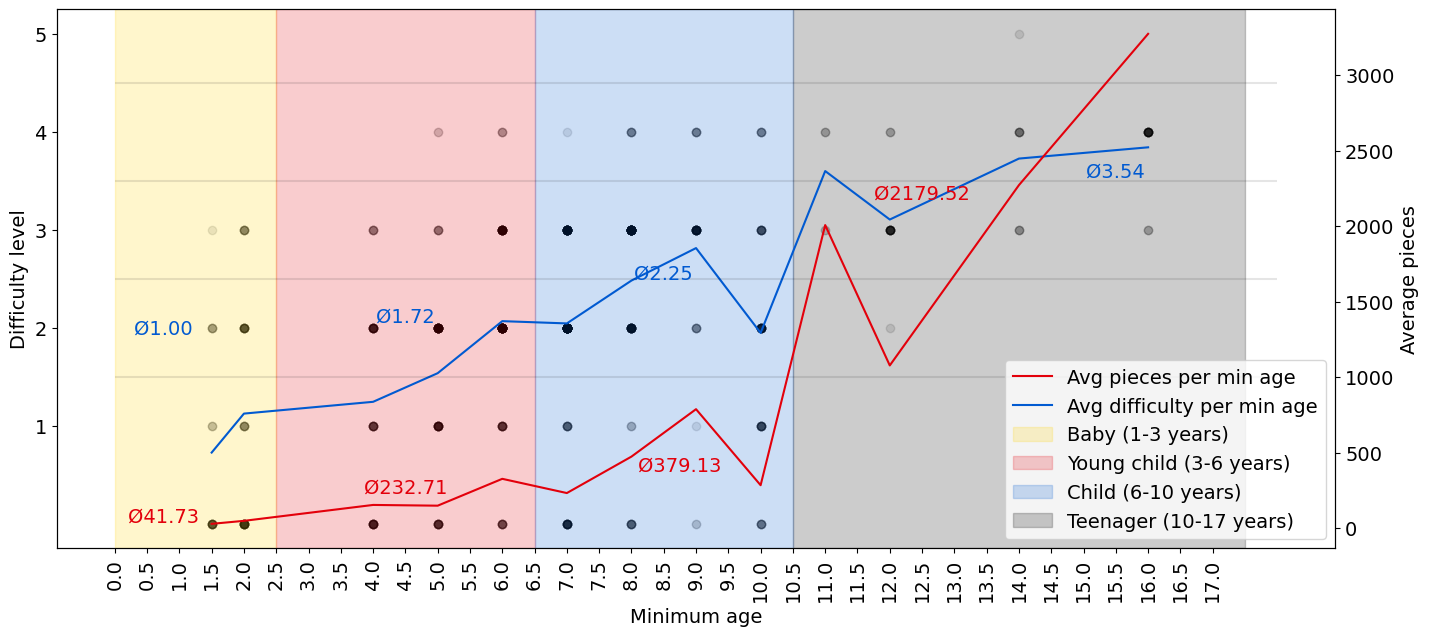

NOTE: the symbol "Ø" is common in the german language area as the symbol for the mean. In this case it is the mean (difficulty or pieces) in the corresponding cluster


In [1209]:

plt.figure(figsize=(16.5, 7), dpi = 300)
fig, ax1 = plt.subplots(figsize=(16.5, 7))


ax1.scatter(x=lego_sets_uniq_id['min_age'], y=lego_sets_uniq_id['review_difficulty'], color=colors['black'], alpha=0.1)
ax1.plot(ages_mean['age_group'], ages_mean['diff_mean'], color=colors['blue'], label='Avg difficulty per min age')
ax1.set_ylabel('Difficulty level')
ax1.set_xlabel('Minimum age')
ax1.set_xticks(np.arange(0, 17.5, 0.5))
ax1.set_yticks(np.arange(1, 6, 1))
ax1.tick_params(axis='x', rotation=90)


ax1.axvspan(xmin=0.0, xmax=2.5, alpha=0.2, color=colors['yellow'], label='Baby (1-3 years)')
ax1.axvspan(xmin=2.5, xmax=6.5, alpha=0.2, color=colors['red'], label='Young child (3-6 years)')
ax1.axvspan(xmin=6.5, xmax=10.5, alpha=0.2, color=colors['blue'], label='Child (6-10 years)')
ax1.axvspan(xmin=10.5, xmax=17.5, alpha=0.2, color=colors['black'], label='Teenager (10-17 years)')


ax1.hlines(y=[1.5, 2.5, 3.5, 4.5], xmin=0, xmax=18, color=colors['black'], alpha=0.1)

ax2 = ax1.twinx()
ax2.plot(ages_mean['age_group'], ages_mean['avg_pieces'], color=colors['red'], label='Avg pieces per min age')
ax2.set_ylabel('Average pieces')


ax1.text(0.75, 1.94, f'Ø{diffmean1_2:.2f}', ha='center', color = colors['blue'])
ax1.text(4.5, 2.06, f'Ø{diffmean3_6:.2f}', ha='center', color = colors['blue'])
ax1.text(8.5, 2.50, f'Ø{diffmean7_10:.2f}', ha='center',color = colors['blue'])
ax1.text(15.5, 3.54, f'Ø{diffmean11_17:.2f}', ha='center',color = colors['blue'])

ax2.text(0.75, 41.73, f'Ø{piecesmean1_2:.2f}', ha='center', color = colors['red'])
ax2.text(4.5, 232.71, f'Ø{piecesmean3_6:.2f}', ha='center', color = colors['red'])
ax2.text(8.75, 379.13, f'Ø{piecesmean7_10:.2f}', ha='center',color = colors['red'])
ax2.text(12.5, 2179.52, f'Ø{piecesmean11_17:.2f}', ha='center',color = colors['red'])

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_2+lines_1 , labels_2 + labels_1, loc='lower right' )

plt.show()

print(f'NOTE: the symbol "Ø" is common in the german language area as the symbol for the mean. In this case it is the mean (difficulty or pieces) in the corresponding cluster')


The subdivision is based on the increasing average difficulty. A fixed age distinction is made between babies and toddlers to prevent accidental swallowing of parts. We can see that the number of parts in this region is also significantly smaller and increases with increasing complexity. 

- Cluster 1-2 years: **Babys**, low number of parts and low complexity
- Cluster 3-6 years: **Small children**, increased number of parts and low complexity
- Cluster 6-10 years: **Children**, high number of parts and medium complexity, **main target group (volume based)**
- Cluster 11-17 year:  **teenager and young adults**, very high number of parts, high complexity, transition away from classic toys to models, **area with highest margin**

### All clusters 

In [1210]:
lego_sets_uniq_id['theme_name'].value_counts()

theme_name
Star Wars™                               94
City                                     71
DUPLO®                                   70
Friends                                  43
Juniors                                  36
Technic                                  36
BrickHeadz                               34
NEXO KNIGHTS™                            32
Creator 3-in-1                           30
DIMENSIONS™                              29
Marvel Super Heroes                      27
THE LEGO® BATMAN MOVIE                   25
Minecraft™                               20
THE LEGO® NINJAGO® MOVIE™                19
Disney™                                  19
NINJAGO®                                 19
Classic                                  18
DC Comics™ Super Heroes                  17
Creator Expert                           17
Speed Champions                          14
MINDSTORMS®                              14
Elves                                    12
Architecture         

In [1211]:
mean_total_price = lego_sets_uniq_id['list_price'].mean().round(2)
mean_total_pieces = (mean_total_price/lego_sets_uniq_id['piece_count'].mean()).round(2)

In [1212]:
grouped_lego_sets_uniq_id = lego_sets_uniq_id.groupby('theme_name')

In [1213]:
results = []
for name, group in grouped_lego_sets_uniq_id:
    mean1 = group['list_price'].mean().round(2)
    mean2 = (mean1 / group['piece_count'].mean()).round(2)
    count = group['theme_name'].count()
    results.append({'theme_name': name,'No_of_sets':count, 'Avg_price': mean1, 'Avg_price_per_piece': mean2 })


results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Avg_price', ascending=False)

results_df.head(5)

,theme_name,No_of_sets,Avg_price,Avg_price_per_piece
31,SERIOUS PLAY®,4,516.74,0.20
18,Ghostbusters™,2,204.99,0.08
9,Creator Expert,17,171.97,0.07
2,BOOST,1,159.99,0.19
20,Indoraptor Rampage at Lockwood Estate,1,129.99,0.13


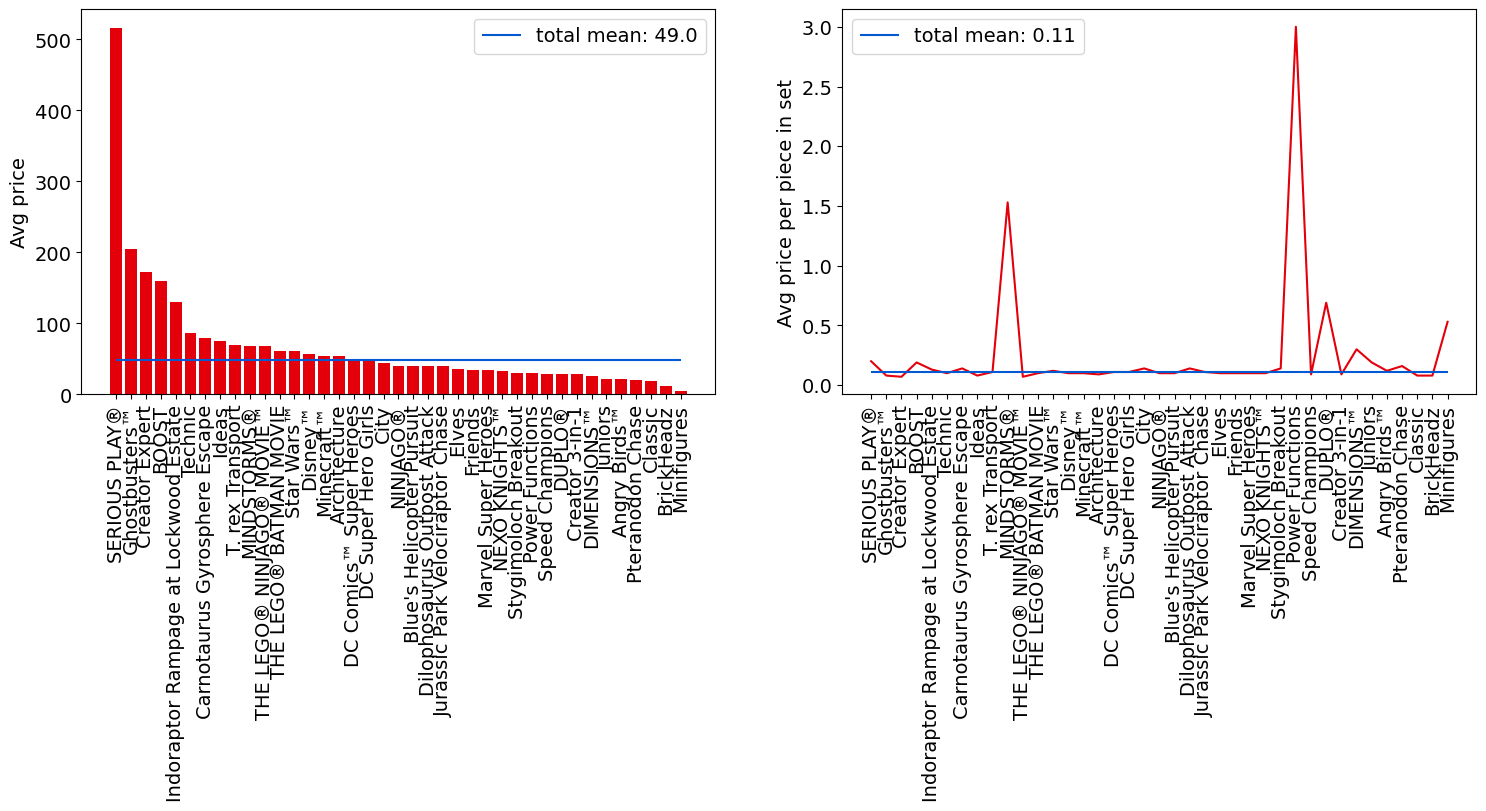

In [1214]:
plt.subplots(1,2,figsize=(18,5))
plt.subplot(1,2,1)
plt.bar(x=results_df['theme_name'], height=results_df['Avg_price'], color = colors['red'])
plt.hlines(y= mean_total_price, xmin=0, xmax=38, color = colors['blue'], label = f'total mean: {mean_total_price.round(2)}')
plt.legend()
plt.xticks(rotation = 90)

plt.ylabel('Avg price')
plt.subplot(1,2,2)
plt.plot(results_df['theme_name'], results_df['Avg_price_per_piece'], color = colors['red'])
plt.ylabel('Avg price per piece in set')
plt.hlines(y= mean_total_pieces, xmin=0, xmax=38, color = colors['blue'], label = f'total mean: {mean_total_pieces.round(2)}')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

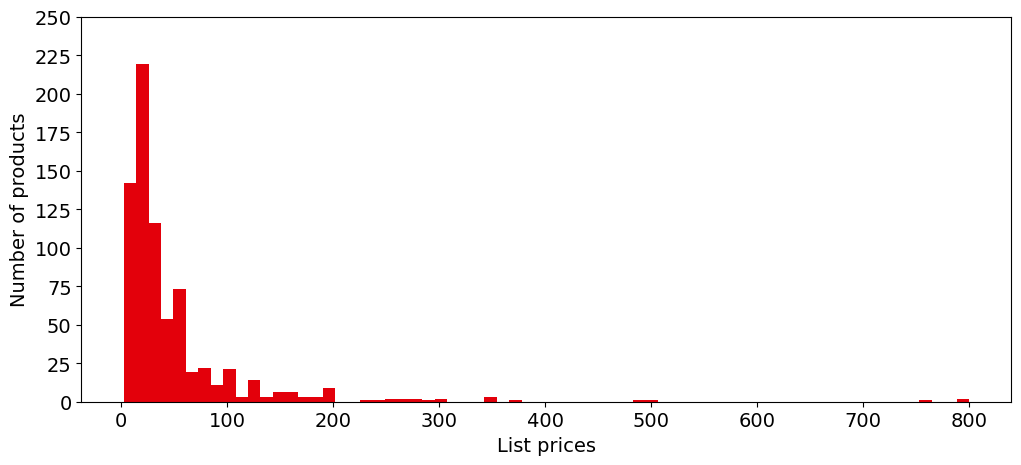

In [1215]:
plt.figure(figsize=(12,5))
plt.hist(lego_sets_uniq_id['list_price'],bins = 68, color=colors['red'])
plt.ylabel('Number of products')
plt.xlabel('List prices')

plt.xticks()
plt.yticks(np.arange(0,275, 25))
plt.show()

In [1216]:

from sklearn.linear_model import LinearRegression


X = lego_sets_uniq_id['min_age'].values.reshape(-1, 1)
y = lego_sets_uniq_id['list_price'].values


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)



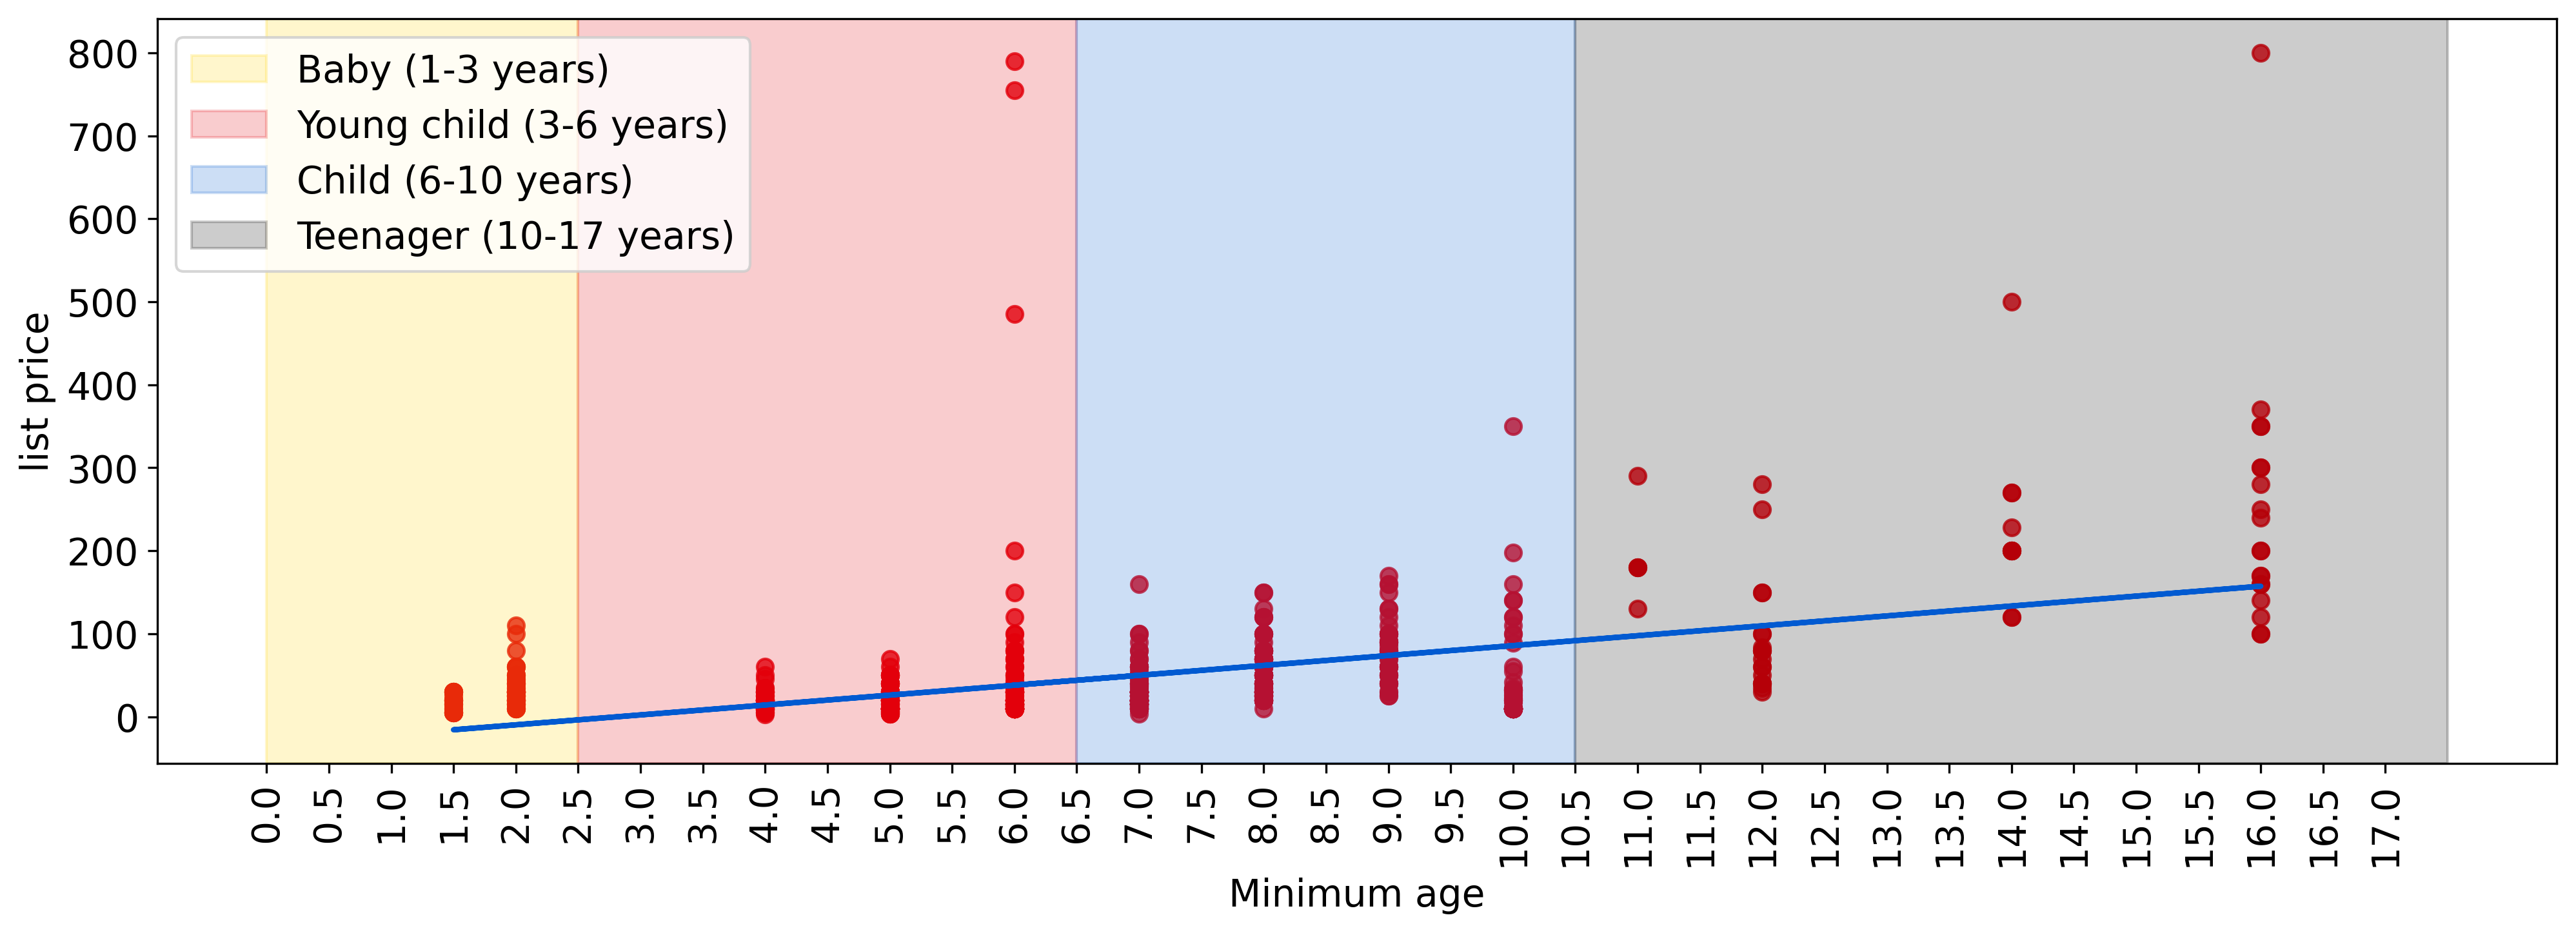

In [1217]:
plt.figure(figsize=(16, 5), dpi = 300)



plt.scatter(lego_sets_uniq_id['min_age'], lego_sets_uniq_id['list_price'], c= colors['red'], alpha =0.8)
plt.plot(lego_sets_uniq_id['min_age'], y_pred, color=colors['blue'], linewidth=2)
plt.ylabel('list price')
plt.xlabel('Minimum age')
plt.xticks(np.arange(0, 17.5, 0.5))

plt.tick_params(axis='x', rotation=90)


plt.axvspan(xmin=0.0, xmax=2.5, alpha=0.2, color=colors['yellow'], label='Baby (1-3 years)')
plt.axvspan(xmin=2.5, xmax=6.5, alpha=0.2, color=colors['red'], label='Young child (3-6 years)')
plt.axvspan(xmin=6.5, xmax=10.5, alpha=0.2, color=colors['blue'], label='Child (6-10 years)')
plt.axvspan(xmin=10.5, xmax=17.5, alpha=0.2, color=colors['black'], label='Teenager (10-17 years)')





plt.legend( loc='upper left' )

plt.show()


In [1218]:
lego_sets['country'].value_counts()

country
US    722
CA    720
NL    510
GB    510
AT    509
DN    509
IE    507
AU    506
CH    505
NZ    503
FR    503
BE    501
IT    488
LU    487
NO    487
FI    487
ES    487
DE    487
CZ    487
PT    485
PL    472
Name: count, dtype: int64

### Cluster analysis

The clusters selected above are now analysed below

In [1219]:
cluster1_2 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] == 1.5) | (lego_sets_uniq_id['min_age'] == 2.0)]
cluster3_6 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 4.0) & (lego_sets_uniq_id['min_age'] <= 6.5)]
cluster7_10 = lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 6.5) & (lego_sets_uniq_id['min_age'] <= 10.5)]
cluster11_17 =lego_sets_uniq_id.loc[(lego_sets_uniq_id['min_age'] >= 10.5)]

#### Cluster 1-2 years: Babys

In [1220]:
cluster1_2['theme_name'].value_counts()

theme_name
DUPLO®    70
Name: count, dtype: int64

In [1221]:
cluster1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 279 to 1026
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               70 non-null     object 
 1   list_price         70 non-null     float64
 2   num_reviews        70 non-null     float64
 3   piece_count        70 non-null     float64
 4   play_star_rating   70 non-null     float64
 5   prod_id            70 non-null     int32  
 6   prod_long_desc     70 non-null     object 
 7   review_difficulty  70 non-null     float64
 8   set_name           70 non-null     object 
 9   star_rating        70 non-null     float64
 10  theme_name         70 non-null     object 
 11  val_star_rating    70 non-null     float64
 12  country            70 non-null     object 
 13  min_age            70 non-null     float64
dtypes: float64(8), int32(1), object(5)
memory usage: 7.9+ KB


In [1222]:
mean1 = cluster1_2['list_price'].mean().round(2)
mean2 = (mean1/cluster1_2['piece_count'].mean()).round(2)

print(f'Avg. Price: {mean1}')
print(f'Avg. Price per piece: {mean2}')

Avg. Price: 28.65
Avg. Price per piece: 0.69


#### Cluster 3-6 years: Small children

In [1223]:
cluster3_6['theme_name'].value_counts()

theme_name
City                                64
Juniors                             36
Friends                             36
Star Wars™                          22
Classic                             18
Disney™                             17
Marvel Super Heroes                 14
DC Comics™ Super Heroes             10
Creator 3-in-1                       6
NINJAGO®                             6
SERIOUS PLAY®                        4
Minifigures                          4
Angry Birds™                         3
THE LEGO® NINJAGO® MOVIE™            2
THE LEGO® BATMAN MOVIE               2
Minecraft™                           2
NEXO KNIGHTS™                        1
Stygimoloch Breakout                 1
Jurassic Park Velociraptor Chase     1
Pteranodon Chase                     1
Name: count, dtype: int64

In [1224]:
mean_total11 = cluster3_6['list_price'].mean().round(2)
mean_total12 = (mean_total11/cluster3_6['piece_count'].mean()).round(2)


In [1225]:
grouped_cluster3_6 = cluster3_6.groupby('theme_name')

In [1226]:
results = []
for name, group in grouped_cluster3_6:
    mean1 = group['list_price'].mean().round(2)
    mean2 = (mean1 / group['piece_count'].mean()).round(2)
    count = group['theme_name'].count()
    results.append({'theme_name': name,'No_of_sets':count, 'Avg_price': mean1, 'Avg_price_per_piece': mean2 })


results_df1 = pd.DataFrame(results)

results_df1 = results_df1.sort_values(by='Avg_price', ascending=False)

results_df1.head(5)

,theme_name,No_of_sets,Avg_price,Avg_price_per_piece
15,SERIOUS PLAY®,4,516.74,0.20
8,Jurassic Park Velociraptor Chase,1,39.99,0.11
1,City,64,37.52,0.14
5,Disney™,17,30.34,0.12
17,Stygimoloch Breakout,1,29.99,0.14


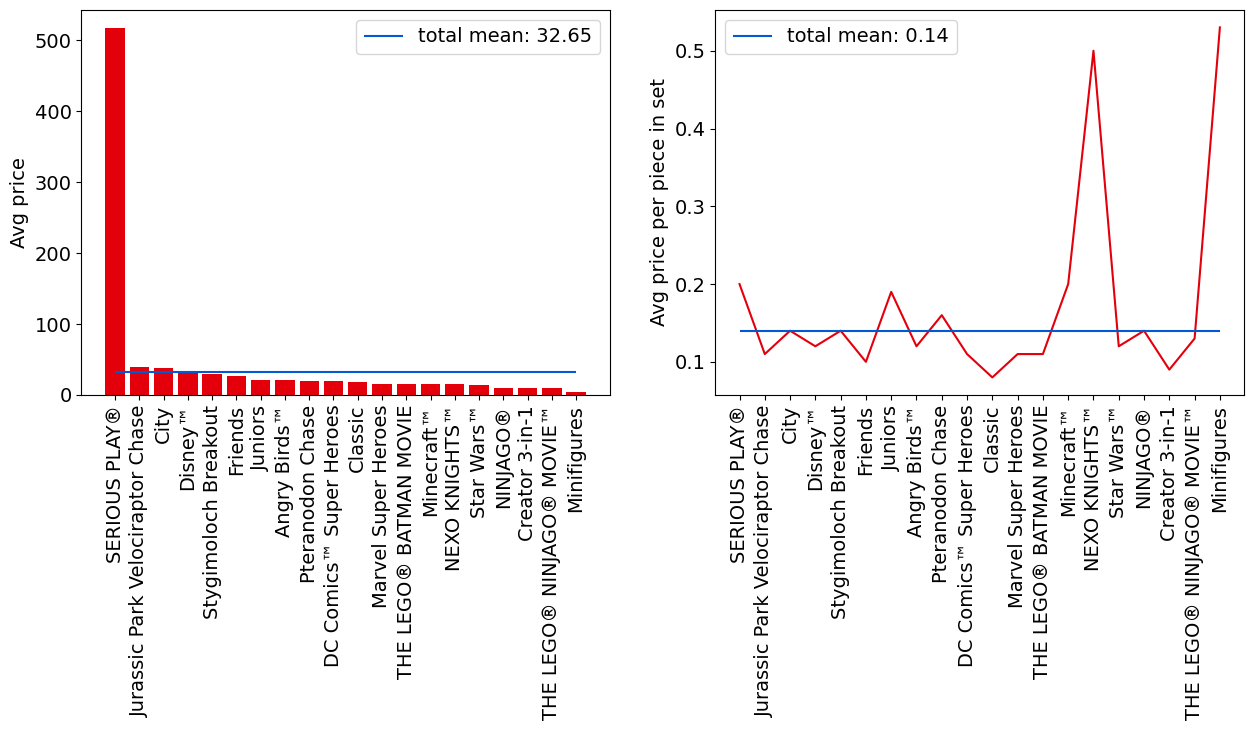

In [1227]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x=results_df1['theme_name'], height=results_df1['Avg_price'], color = colors['red'])
plt.hlines(y= mean_total11, xmin=0, xmax=19, color = colors['blue'], label = f'total mean: {mean_total11.round(2)}')
plt.legend()
plt.xticks(rotation = 90)

plt.ylabel('Avg price')
plt.subplot(1,2,2)
plt.plot(results_df1['theme_name'], results_df1['Avg_price_per_piece'], color = colors['red'])
plt.ylabel('Avg price per piece in set')
plt.hlines(y= mean_total12, xmin=0, xmax=19, color = colors['blue'], label = f'total mean: {mean_total12.round(2)}')
plt.legend()
plt.xticks(rotation = 90)
plt.show()


#### Cluster 7-10 years: Children

In [1228]:
cluster7_10['theme_name'].value_counts()

theme_name
Star Wars™                               66
BrickHeadz                               34
NEXO KNIGHTS™                            31
Technic                                  29
DIMENSIONS™                              29
Creator 3-in-1                           24
THE LEGO® BATMAN MOVIE                   21
Minecraft™                               17
THE LEGO® NINJAGO® MOVIE™                16
Speed Champions                          14
MINDSTORMS®                              14
Elves                                    12
NINJAGO®                                 12
Marvel Super Heroes                      12
DC Super Hero Girls                       8
Friends                                   7
City                                      7
DC Comics™ Super Heroes                   6
Ideas                                     3
BOOST                                     1
Carnotaurus Gyrosphere Escape             1
Blue's Helicopter Pursuit                 1
Dilophosaurus Outpost

In [1229]:
mean_total21 = cluster7_10['list_price'].mean().round(2)
mean_total22 = (mean_total21/cluster7_10['piece_count'].mean()).round(2)


In [1230]:
grouped_cluster7_10 = cluster7_10.groupby('theme_name')

In [1231]:
results = []
for name, group in grouped_cluster7_10:
    mean1 = group['list_price'].mean().round(2)
    mean2 = (mean1 / group['piece_count'].mean()).round(2)
    count = group['theme_name'].count()
    results.append({'theme_name': name,'No_of_sets':count, 'Avg_price': mean1, 'Avg_price_per_piece': mean2 })


results_df2 = pd.DataFrame(results)

results_df2 = results_df2.sort_values(by='Avg_price', ascending=False)

results_df2.head(5)

,theme_name,No_of_sets,Avg_price,Avg_price_per_piece
0,BOOST,1,159.99,0.19
14,Indoraptor Rampage at Lockwood Estate,1,129.99,0.13
4,City,7,107.13,0.13
3,Carnotaurus Gyrosphere Escape,1,79.99,0.14
11,Friends,7,72.13,0.10


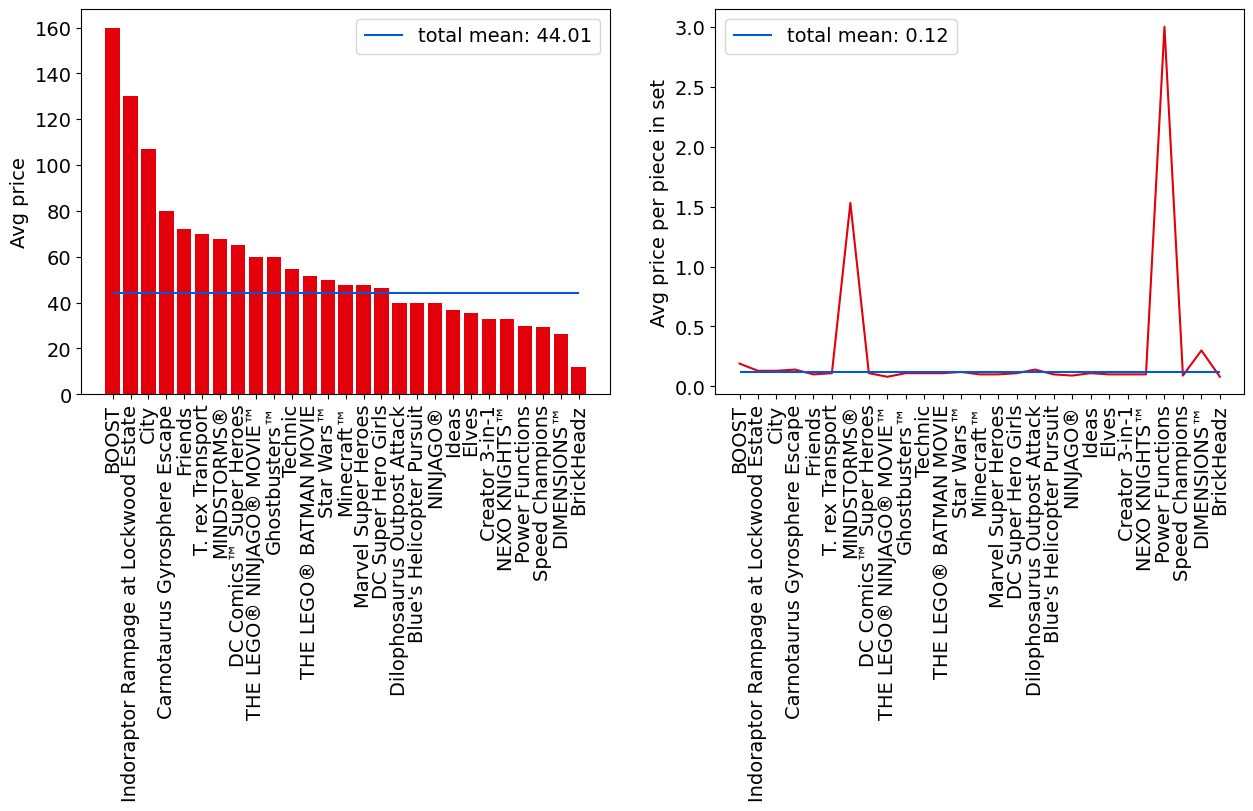

In [1232]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x=results_df2['theme_name'], height=results_df2['Avg_price'], color = colors['red'])
plt.hlines(y= mean_total21, xmin=0, xmax=26, color = colors['blue'], label = f'total mean: {mean_total21.round(2)}')
plt.legend()
plt.xticks(rotation = 90)

plt.ylabel('Avg price')
plt.subplot(1,2,2)
plt.plot(results_df2['theme_name'], results_df2['Avg_price_per_piece'], color = colors['red'])
plt.ylabel('Avg price per piece in set')
plt.hlines(y= mean_total22, xmin=0, xmax=26, color = colors['blue'], label = f'total mean: {mean_total22.round(2)}')
plt.legend()
plt.xticks(rotation = 90)
plt.show()


#### Cluster 11-17 years: Teenager


In [1233]:
cluster11_17['theme_name'].value_counts()

theme_name
Creator Expert               17
Architecture                 10
Technic                       7
Star Wars™                    6
Ideas                         4
THE LEGO® BATMAN MOVIE        2
Disney™                       2
DC Comics™ Super Heroes       1
Ghostbusters™                 1
Marvel Super Heroes           1
Minecraft™                    1
THE LEGO® NINJAGO® MOVIE™     1
NINJAGO®                      1
Name: count, dtype: int64

In [1234]:
mean_total31 = cluster11_17['list_price'].mean().round(2)
mean_total32 = (mean_total31/cluster11_17['piece_count'].mean()).round(2)

In [1235]:
grouped_cluster11_17 = cluster11_17.groupby('theme_name')

In [1236]:
results = []
for name, group in grouped_cluster11_17:
    mean1 = group['list_price'].mean().round(2)
    mean2 = (mean1 / group['piece_count'].mean()).round(2)
    count = group['theme_name'].count()
    results.append({'theme_name': name,'No_of_sets':count, 'Avg_price': mean1, 'Avg_price_per_piece': mean2 })


results_df3 = pd.DataFrame(results)

results_df3 = results_df3.sort_values(by='Avg_price', ascending=False)

results_df3.head(5)

,theme_name,No_of_sets,Avg_price,Avg_price_per_piece
4,Ghostbusters™,1,349.99,0.08
9,Star Wars™,6,349.99,0.11
11,THE LEGO® NINJAGO® MOVIE™,1,299.99,0.06
3,Disney™,2,274.99,0.09
2,DC Comics™ Super Heroes,1,269.99,0.11


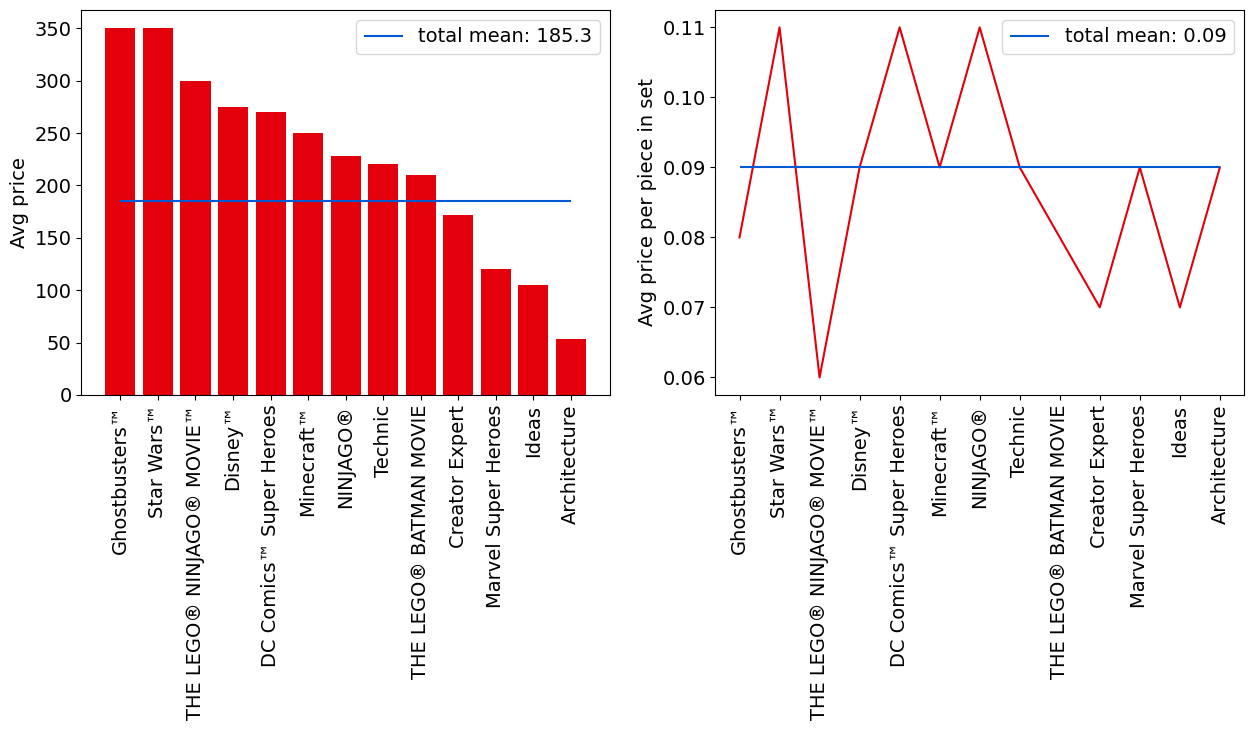

In [1237]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x=results_df3['theme_name'], height=results_df3['Avg_price'], color = colors['red'])
plt.hlines(y= mean_total31, xmin=0, xmax=12, color = colors['blue'], label = f'total mean: {mean_total31.round(2)}')
plt.legend()
plt.xticks(rotation = 90)

plt.ylabel('Avg price')
plt.subplot(1,2,2)
plt.plot(results_df3['theme_name'], results_df3['Avg_price_per_piece'], color = colors['red'])
plt.ylabel('Avg price per piece in set')
plt.hlines(y= mean_total32, xmin=0, xmax=12, color = colors['blue'], label = f'total mean: {mean_total32.round(2)}')
plt.legend()
plt.xticks(rotation = 90)
plt.show()


# Amazon data

In [1238]:
print(f'amazon_insights: {amazon_insights.shape}')

amazon_insights: (10000, 17)


In [1239]:
amazon_insights['manufacturer'].value_counts().head(10).index

Index(['LEGO', 'Disney', 'Oxford Diecast', 'Playmobil', 'Star Wars', 'Mattel',
       'Hasbro', 'The Puppet Company', 'MyTinyWorld', 'Corgi'],
      dtype='object', name='manufacturer')

In [1240]:
competitors = ['LEGO','Mattel','Hasbro','Playmobil','Disney','Star Wars']

In [1241]:
firms = (amazon_insights[amazon_insights['manufacturer'].isin(competitors)])


In [1242]:
firms['number_available_in_stock'] = firms['number_available_in_stock'].fillna('0')
firms['number_available_in_stock'] = firms['number_available_in_stock'].str.extract('(\d+)').astype(float).astype(int)
firms['number_of_reviews'] = firms['number_of_reviews'].fillna(0)
firms['number_of_reviews'] = firms['number_of_reviews'].astype(int)

firms['average_review_rating'] = firms['average_review_rating'].str.extract(r'(\d+\.\d+)').astype(float)

firms['price'] = firms['price'].str.extract(r'(\d+\.\d+)').astype(float)

firms['number_of_answered_questions']= firms['number_of_answered_questions'].fillna(0)

C:\Users\BMidd\AppData\Local\Temp\ipykernel_12032\2534636580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firms['number_available_in_stock'] = firms['number_available_in_stock'].fillna('0')
C:\Users\BMidd\AppData\Local\Temp\ipykernel_12032\2534636580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firms['number_available_in_stock'] = firms['number_available_in_stock'].str.extract('(\d+)').astype(float).astype(int)
C:\Users\BMidd\AppData\Local\Temp\ipykernel_12032\2534636580.py:3: SettingWithCopyW

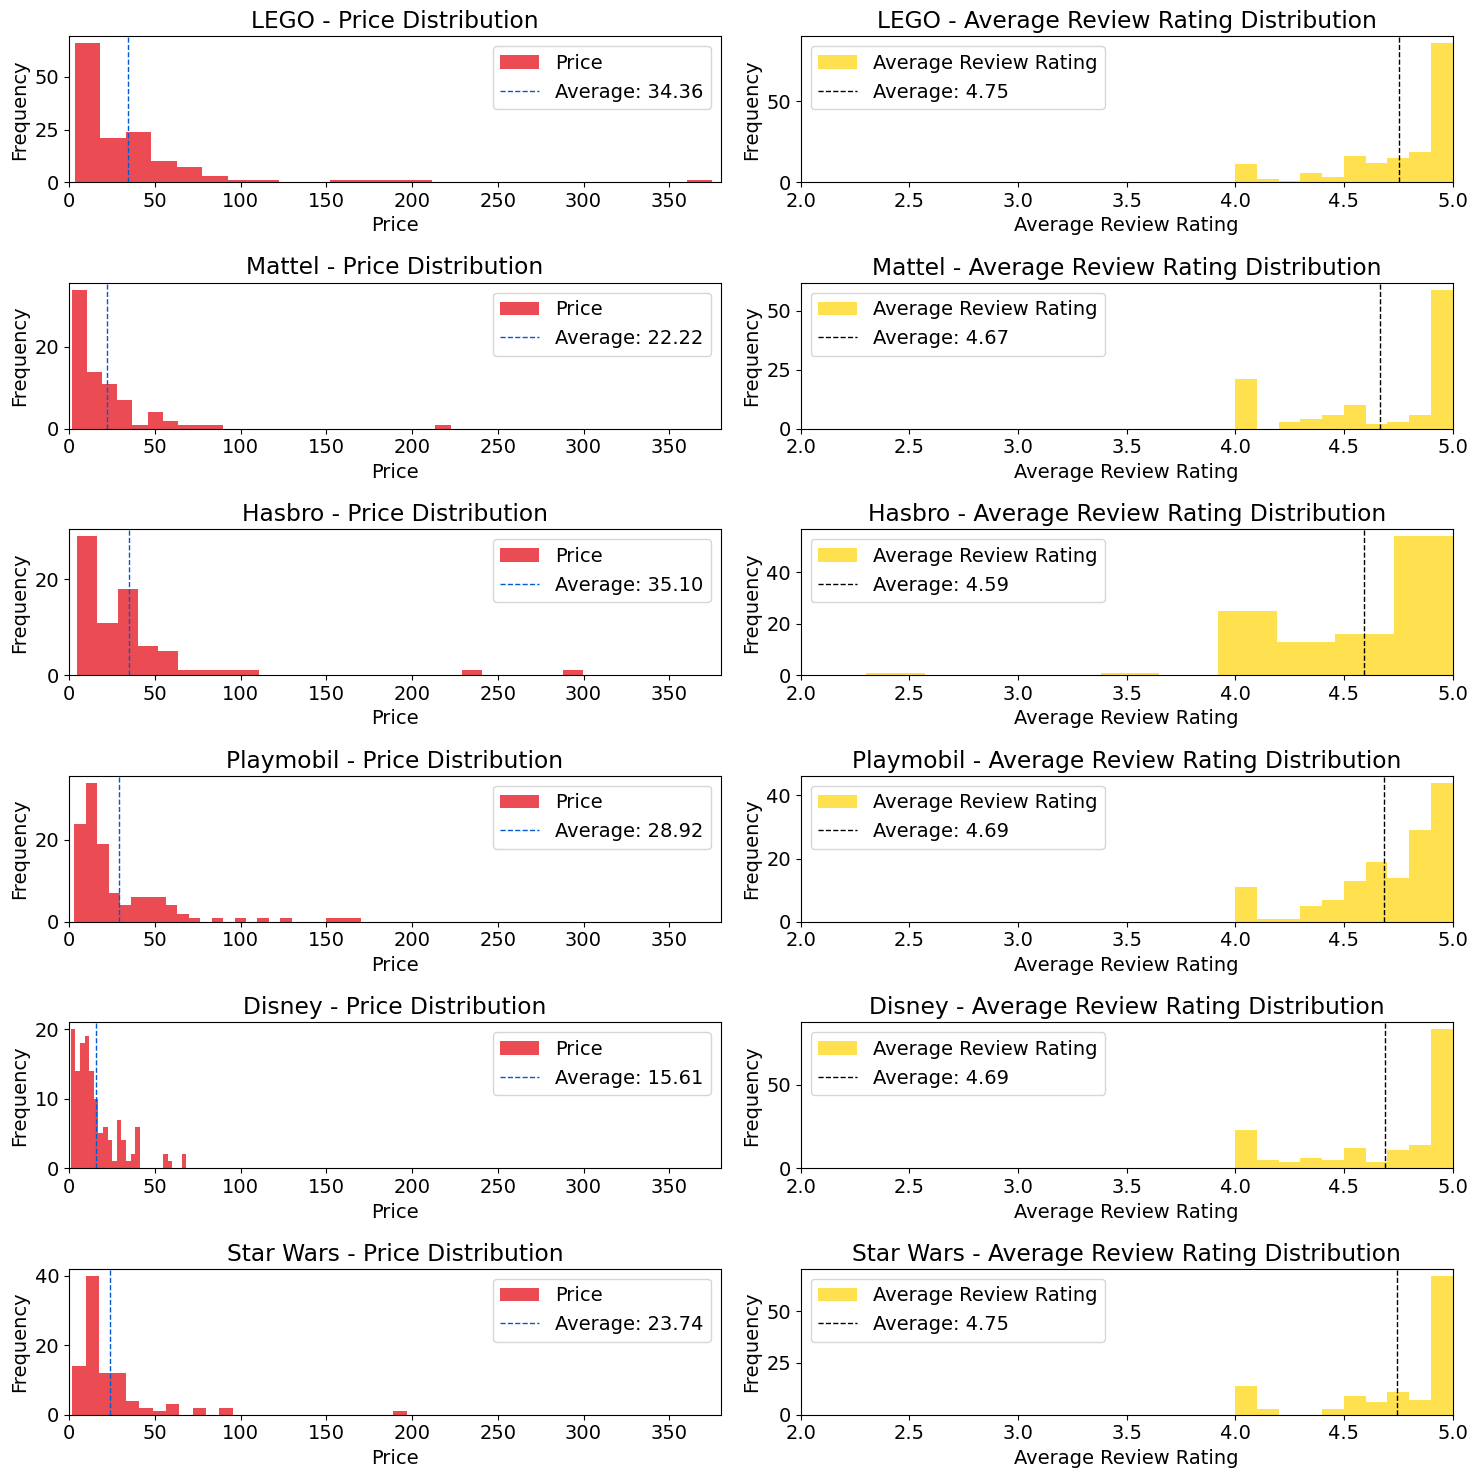

In [1243]:
fig, axs = plt.subplots(6, 2, figsize=(15, 15))

for i, competitor in enumerate(competitors):
    subset = firms[firms['manufacturer'] == competitor]
    

    axs[i, 0].hist(subset['price'], bins=25, alpha=0.7, label='Price', color=colors['red'])
    avg_price = np.mean(subset['price'])
    axs[i, 0].axvline(avg_price, color=colors['blue'], linestyle='dashed', linewidth=1, label=f'Average: {avg_price:.2f}')
    axs[i, 0].set_title(f'{competitor} - Price Distribution')
    axs[i, 0].set_xlabel('Price')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].set_xlim(0, 380)  
    axs[i, 0].legend()
    
 
    axs[i, 1].hist(subset['average_review_rating'], bins=10, alpha=0.7, label='Average Review Rating', color=colors['yellow'])
    avg_rating = np.mean(subset['average_review_rating'])
    axs[i, 1].axvline(avg_rating, color=colors['black'], linestyle='dashed', linewidth=1, label=f'Average: {avg_rating:.2f}')
    axs[i, 1].set_title(f'{competitor} - Average Review Rating Distribution')
    axs[i, 1].set_xlabel('Average Review Rating')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_xlim(2, 5)  
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

In [1244]:
amazon_insights = amazon_insights.loc[amazon_insights['manufacturer'].str.contains('lego', case= False, na =False )]
amazon_insights.reset_index(inplace=True)

In [1245]:
amazon_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   index                                        171 non-null    int64  
 1   uniq_id                                      171 non-null    object 
 2   product_name                                 171 non-null    object 
 3   manufacturer                                 171 non-null    object 
 4   price                                        138 non-null    object 
 5   number_available_in_stock                    168 non-null    object 
 6   number_of_reviews                            171 non-null    object 
 7   number_of_answered_questions                 158 non-null    float64
 8   average_review_rating                        171 non-null    object 
 9   amazon_category_and_sub_category             68 non-null     object 
 10  cu

In [1246]:
amazon_insights['number_available_in_stock'].value_counts().head()

number_available_in_stock
3 new    17
8 new    13
4 new    13
6 new    12
2 new    10
Name: count, dtype: int64

In [1247]:
amazon_insights['number_available_in_stock'] = amazon_insights['number_available_in_stock'].fillna('0')
amazon_insights['number_available_in_stock'] = amazon_insights['number_available_in_stock'].str.replace(',', '')
amazon_insights['number_available_in_stock'] = amazon_insights['number_available_in_stock'].str.extract('(\d+)').astype(int)


amazon_insights['number_of_reviews'] = amazon_insights['number_of_reviews'].fillna(0)
amazon_insights['number_of_reviews'] = amazon_insights['number_of_reviews'].astype(str).str.replace(',', '')
amazon_insights['number_of_reviews'] = amazon_insights['number_of_reviews'].str.extract('(\d+)').astype(int)


amazon_insights['average_review_rating'] = amazon_insights['average_review_rating'].str.extract(r'(\d+\.\d+)').astype(float)
amazon_insights['price'] = amazon_insights['price'].str.extract(r'(\d+\.\d+)').astype(float)
amazon_insights['number_of_answered_questions'] = amazon_insights['number_of_answered_questions'].fillna(0)



In [1248]:
amazon_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   index                                        171 non-null    int64  
 1   uniq_id                                      171 non-null    object 
 2   product_name                                 171 non-null    object 
 3   manufacturer                                 171 non-null    object 
 4   price                                        138 non-null    float64
 5   number_available_in_stock                    171 non-null    int32  
 6   number_of_reviews                            171 non-null    int32  
 7   number_of_answered_questions                 171 non-null    float64
 8   average_review_rating                        171 non-null    float64
 9   amazon_category_and_sub_category             68 non-null     object 
 10  cu

Most popular items:

In [1249]:
amazon_insights.sort_values(by='number_of_reviews', ascending=False).head(10)

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
69,2531,35353320134e93e3e4ff8f3ef027d1b7,LEGO Star Wars 75038: Jedi Interceptor,LEGO,49.90,35,133,4.0,4.7,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/LEGO-Star-Wars-75039-S...,Product Description Load up Anakin and R2-D2 i...,Technical Details Item Weight299 g Product Dim...,Product Description Load up Anakin and R2-D2 i...,http://www.amazon.co.uk/LEGO-Star-Wars-75135-I...,NaN,Great set for the money // 5.0 // 8 Jun. 2014 ...,NaN
87,2566,435becb9b5db7c5c058dd5802d5fa466,LEGO Technic 42010: Off-Road Racer,LEGO,39.63,18,117,6.0,4.8,NaN,http://www.amazon.co.uk/LEGO-Technic-42011-Rac...,Product Description The rugged Off-Road Racer ...,Technical Details Item Weight281 g Product Dim...,Product Description The rugged Off-Road Racer ...,http://www.amazon.co.uk/LEGO-Technic-42033-Rec...,Want to buy this for my 11 year old (intellige...,One happy grandson // 5.0 // 22 July 2013 // B...,"{""seller""=>[{""Seller_name_1""=>""1234becky"", ""Se..."
84,2561,18893949132f1b51ae690940bba53c36,LEGO Juniors 10672: Batman Defend the Batcave,LEGO,39.99,30,110,1.0,4.8,NaN,http://www.amazon.co.uk/LEGO-10687-Juniors-Spi...,"Product Description To the Batcave, Robin! The...",Technical Details Item Weight9 g Product Dimen...,"Product Description To the Batcave, Robin! The...",http://www.amazon.co.uk/LEGO-10687-Juniors-Spi...,Is Lego junior compatible with normal sized Le...,"superb for changing little ones onto ""proper"" ...","{""seller""=>[{""Seller_name_1""=>""WOW WEE"", ""Sell..."
93,2577,353191e015d7a6dfe162cff63df4bfeb,LEGO City 60007: High Speed Chase,LEGO,28.95,51,109,7.0,4.9,NaN,http://www.amazon.co.uk/LEGO-City-Police-60043...,Product Description Start a High Speed Chase t...,Technical Details Item Weight499 g Product Dim...,Product Description Start a High Speed Chase t...,http://www.amazon.co.uk/LEGO-City-Police-60044...,NaN,Excellent // 5.0 // 29 May 2013 // By\n \n ...,"{""seller""=>[{""Seller_name_1""=>""Colorful Life L..."
121,6915,0039295c7fcefba10d5fc333eff806d3,LEGO City Airport 60022: Cargo Terminal,LEGO,199.18,16,105,1.0,4.7,NaN,http://www.amazon.co.uk/LEGO-City-Airport-6002...,Product Description Get busy loading the cargo...,Technical Details Item Weight1.8 Kg Product Di...,Product Description Get busy loading the cargo...,http://www.amazon.co.uk/LEGO-60095-Explorers-E...,NaN,Lego City Cargo Terminal // 4.0 // 18 Nov. 201...,"{""seller""=>[{""Seller_name_1""=>""BrickVault"", ""S..."
11,765,d71f16a9306495104c3b1570d38d3c6f,LEGO Friends 41040 LEGO Friends Advent Calendar,LEGO,27.00,33,102,1.0,4.9,NaN,http://www.amazon.co.uk/LEGO-City-60099-Advent...,Product Description Count down to a LEGO Frien...,Technical Details Item Weight381 g Product Dim...,Product Description Count down to a LEGO Frien...,http://www.amazon.co.uk/LEGO-Friends-41102-Adv...,Product description doesn't match images - Can...,it's great my 8 year old daughter will love it...,"{""seller""=>[{""Seller_name_1""=>""L'Empire d'Herm..."
10,760,342d2b01ed22bc6a889a4b33949d516f,LEGO Friends 41102 Advent Calendar,LEGO,19.99,72,101,7.0,4.6,NaN,http://www.amazon.co.uk/LEGO-City-60099-Advent...,Product Description Count down to a LEGO Frien...,Technical Details Item Weight100 g Product Dim...,Product Description Count down to a LEGO Frien...,http://www.amazon.co.uk/LEGO-Disney-Princess-4...,NaN,Worst of the Lego advent calendars. // 2.0 // ...,"{""seller""=>[{""Seller_name_1""=>""Fast Japan eu"",..."
73,2536,c8a68f355965b686fc77affbccccdb1f,LEGO Friends 41036: Jungle Bridge Rescue,LEGO,34.84,38,88,2.0,4.9,NaN,http://www.amazon.co.uk/LEGO-Friends-41032-Fir...,Product Description Save the baby be

In [1250]:
amazon_insights.to_csv('../data/amazon_insights.csv')
firms.to_csv('../data/firms.csv')
cluster1_2.to_csv('../data/cluster1_2.csv')
cluster3_6.to_csv('../data/cluster3_6.csv')
cluster7_10.to_csv('../data/cluster7_10.csv')
cluster11_17.to_csv('../data/cluster11_17.csv')
lego_sets_uniq_id.to_csv('../data/lego_sets_uniq_id.csv')